# Breast Canser Classification

This notebook's major objective is to clearly demonstrate the procedures of data preprocessing while also creating a machine learning model from scratch. We will make use of the Breast Cancer Wisconsin (Diagnostic) Data Set to accomplish our objective. You can click the following link to learn more about the dataset and download it: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## Content
* Importing the Required Libraries and Dataset
* Explarotary Data Analysis (EDA)
* Outlier Detection
* Creating the Train and Test Split
* Standardization
* KNN Classification
* Principle Component Analysis (PCA)
* Neighbourhood Components Analysis (NCA)
* Results

Now, we are ready to build the notebook. Let's start importing the libraries that we will use and the dataset.

## Importing the Required Libraries and Dataset

In [1]:
# for mathematical calculations
import numpy as np

# to import and manipulate the dataset
import pandas as pd

# to visualize the data and results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# to build the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

We imported the required libraries above. Now, let's take a glance at the dataset and the distributions of targets. As you know, we want to predict the diagnosis column by using other columns, so the diagnosis column is our target column. Therefore, it is reasonable to change the name of the diagnosis column to target.

In [2]:
# import the dataset

data = pd.read_csv("data.csv")
data.drop(["Unnamed: 32", "id"], inplace = True, axis = 1)

data.rename(columns = {"diagnosis": "target"}, inplace = True)

data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Since the target column contains strings, we need to first convert these to integers. We can use the list comprehension method to do this.

In [3]:
data["target"] = [1 if i.strip() == 'M' else 0 for i in data["target"]]

data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's look at the distribution and length of the data in target column.

0    357
1    212
Name: target, dtype: int64
Total: 569


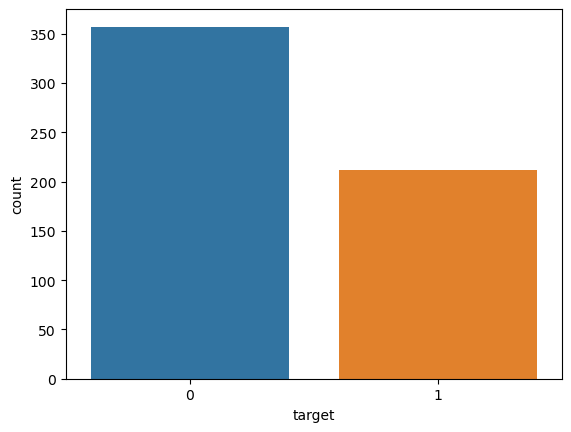

In [4]:
print(data["target"].value_counts())
print("Total:", len(data["target"]))

sns.countplot(x = data["target"])

plt.show()

To understand the dataset deeply, let's examine it in detail.

In [5]:
print("Dataset Shape:", data.shape)

data.info()

Dataset Shape: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  a

In [6]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


When looking at the tables above, we first realize that there is no missing value in the dataset. This is not new because we know that from the dataset description. Also, when examining the mean row of the second table, the difference between the columns is quite large. Therefore, we can conclude that standardization is a must for this dataset. Now, let's continue with the second subtopic, which is Explarotary Data Analysis (EDA)

## Explarotary Data Analysis (EDA)

In this section, we will understand in more detailed the relationships between the features. First, let's create the correlation matrix, and examine it.

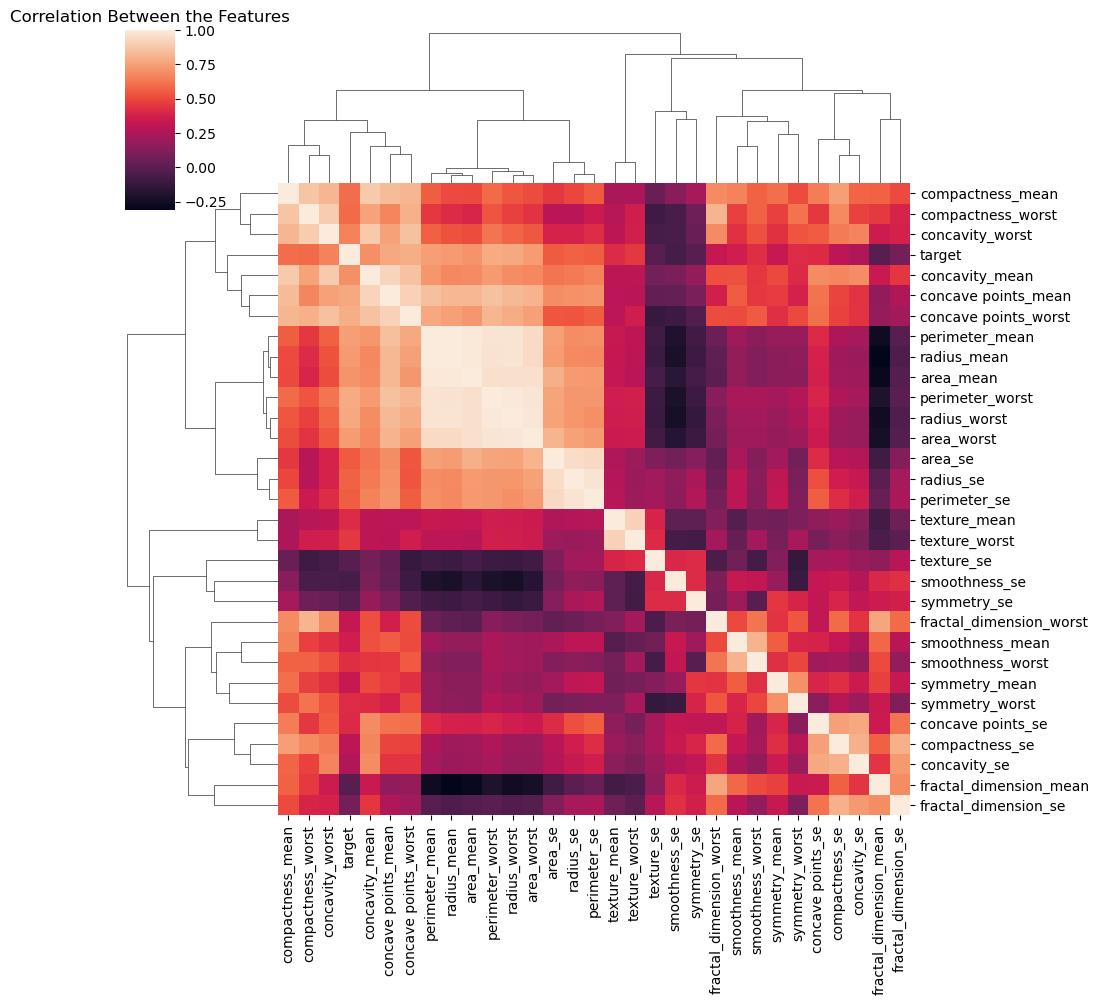

In [7]:
# correlation matrix

corrMatrix = data.corr()

sns.clustermap(corrMatrix, annot = False)
plt.title("Correlation Between the Features")

plt.show()

As you see, the correlation matrix is really complex, so it is hard to deduce by looking at this. To simply it, let's create another correlation matrix with a threshold number. 

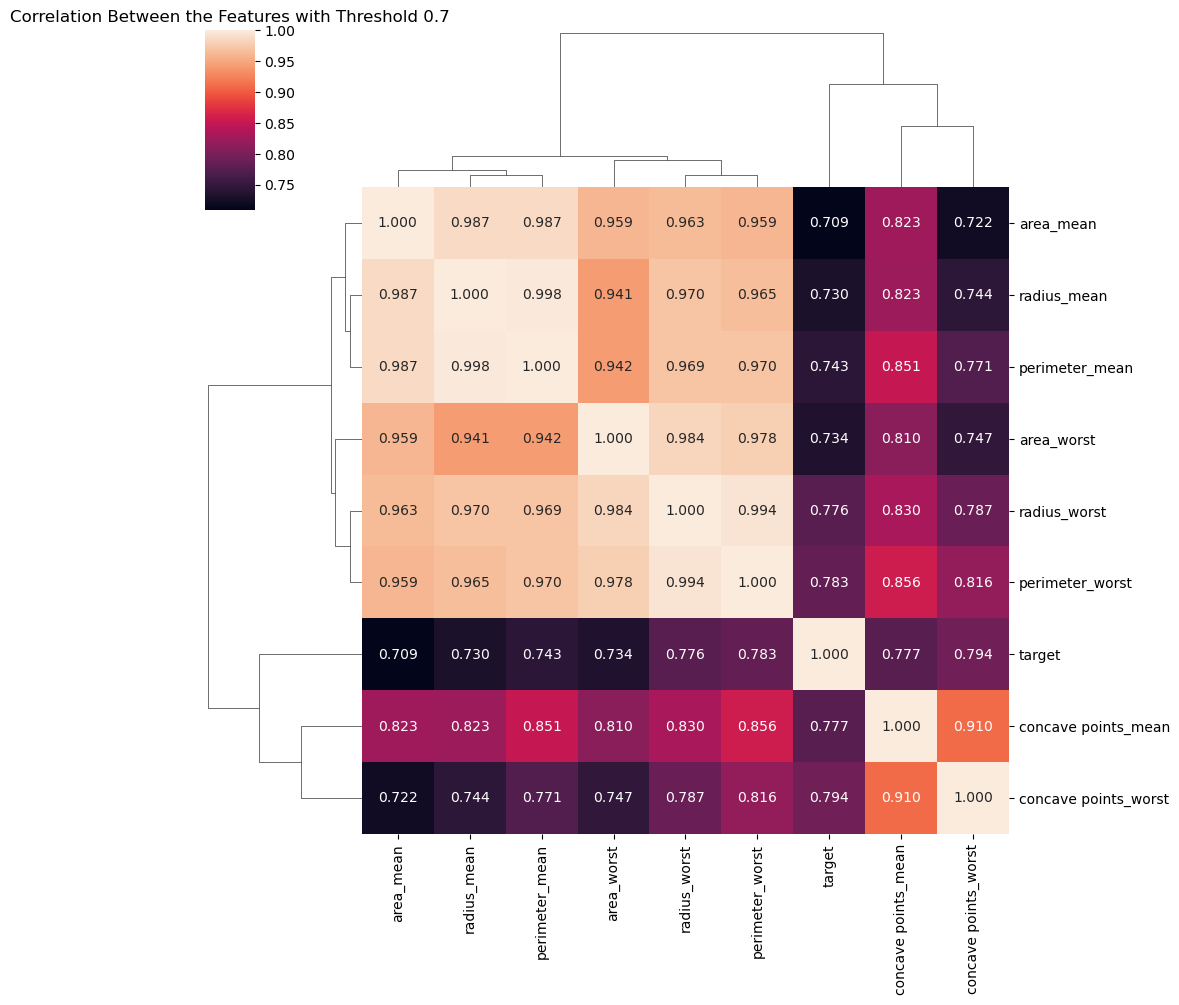

In [8]:
# simplified correlation matrix

threshold = 0.7

filt = np.abs(corrMatrix["target"]) > threshold
corrFeatures = corrMatrix.columns[filt].tolist()

sns.clustermap(data[corrFeatures].corr(), annot = True, fmt = ".3f")
plt.title("Correlation Between the Features with Threshold 0.7")

plt.show()

Now, let's create a pair plot with the features in the second correlation matrix.

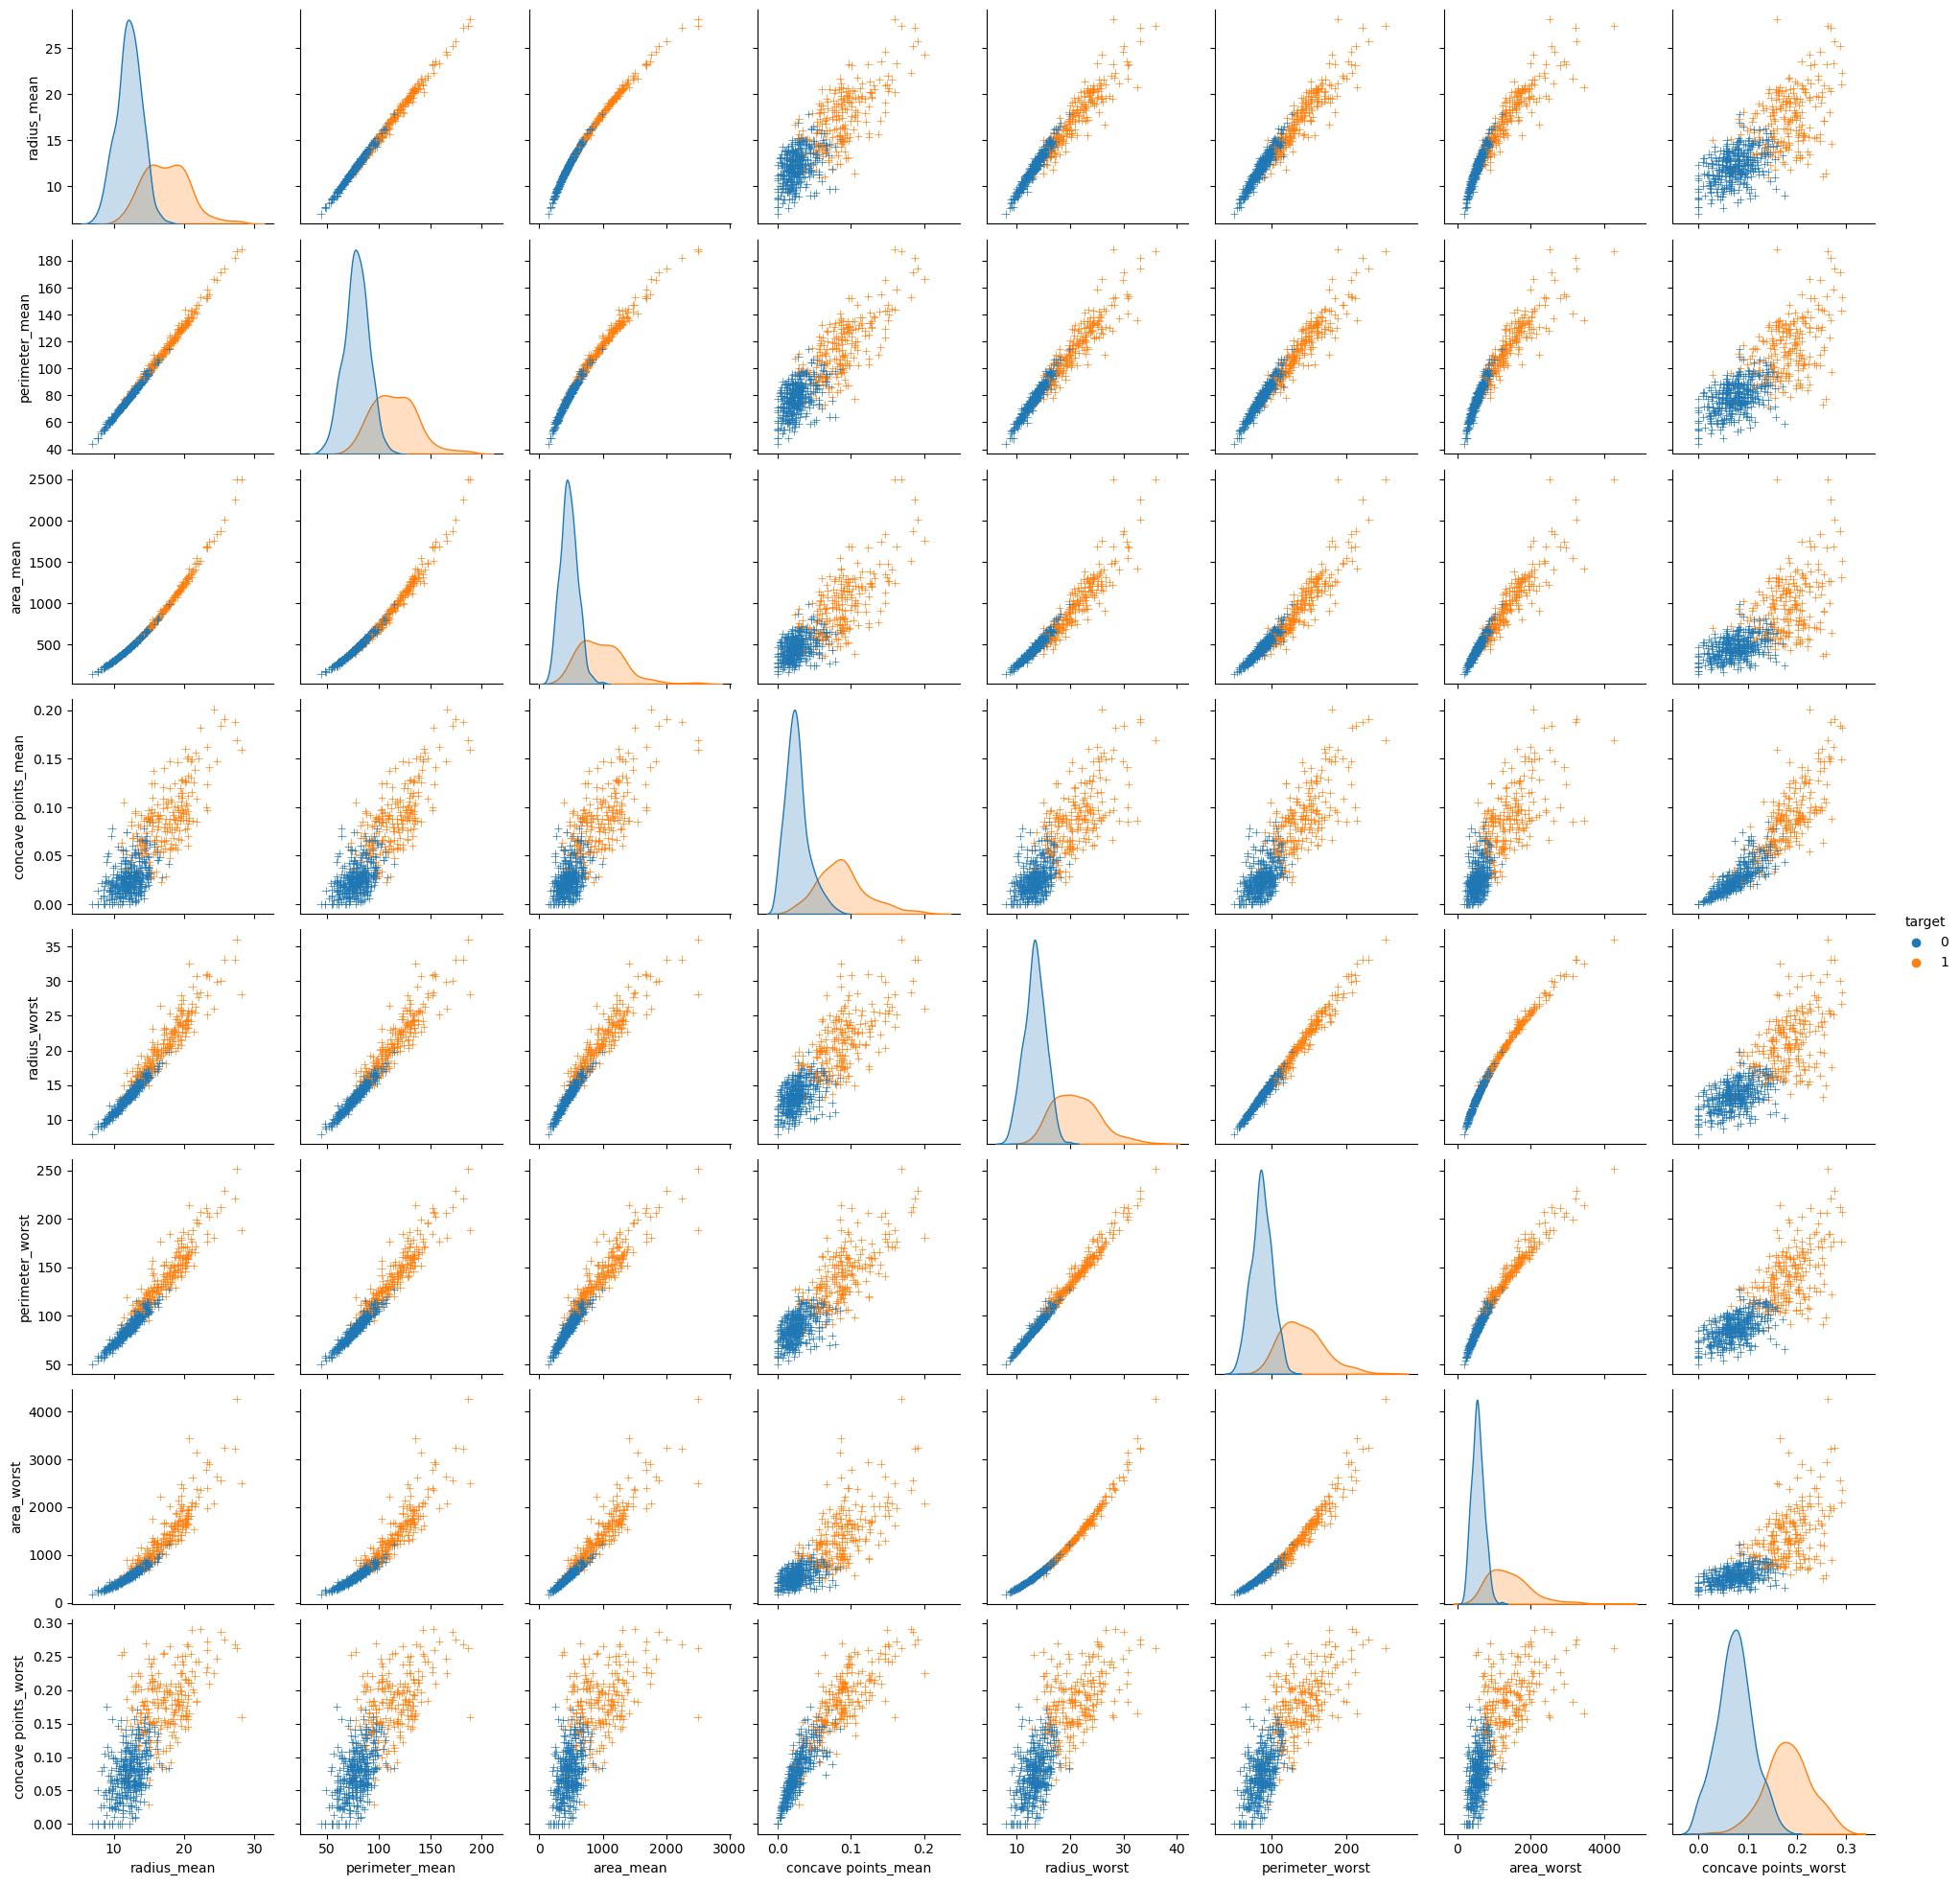

In [9]:
sns.pairplot(data[corrFeatures], diag_kind = "kde", markers = '+', hue = "target")

plt.show()

When looking at the above graphs, some of them have positive skewness. Therefore, we need to select an outlier detection method considering these.

## Outlier Detection

To deal with only the necessary data, the outliers need to be gotten rid of. Since the dataset has skewed data, using the Local Outlier Factor (LOF) as the outlier detection method will be appropriate. You can click the link to understand what the LOF is and what the calculations are behind it: https://en.wikipedia.org/wiki/Local_outlier_factor

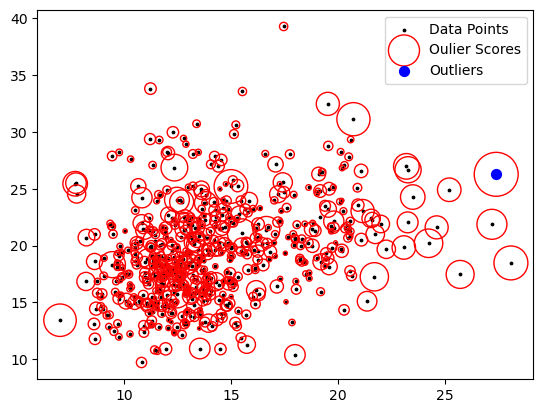

In [10]:
# outlier detection

y = data["target"]
x = data.drop(["target"], axis = 1)

clf = LocalOutlierFactor(n_neighbors = 20)
clf.fit_predict(x)
xScore = clf.negative_outlier_factor_

outlierScore = pd.DataFrame()
outlierScore["score"] = xScore

threshold = -2.5
filt = outlierScore["score"] < threshold
outlierIndex = outlierScore[filt].index.tolist()

radius = (xScore.max() - xScore) / (xScore.max() - xScore.min())
outlierScore["radius"] = radius

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color = 'k', s = 3, label = "Data Points")
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s = 1000 * radius, edgecolors = 'r', facecolors = "none", label = "Oulier Scores")
plt.scatter(x.iloc[outlierIndex, 0], x.iloc[outlierIndex, 1], color = 'b', s = 50, label = "Outliers")
plt.legend()

plt.show()

As you see above, we detected the outliers by using the method of LOF. According to the LOF, the data whose negative outlier factor is less than -1 is an outlier. However, we used the threshold value of -2.5 instead of -1 in order to prevent the loss of data. Now, let's drop the outliers from the dataset.

In [11]:
# drop outliers

x = x.drop(outlierIndex)
y = y.drop(outlierIndex).values

## Creating the Train and Test Split

We must now divide the data into train and test in order to organize it for the model. Train data are used to help the model learn and test data are used to determine whether the model is functioning properly.

In [12]:
# creat the train and test split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Standardization

In our dataset, magnitude difference between data is large. This means that some data can dominate other data. To prevent this, we will standart the data. In this way, we will decrease the magnitude difference.

In [13]:
# standardization

scaler = StandardScaler()
xTrain =  scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

## KNN Classification

In this notebook, we will use the KNN algorithm to predict the test values. If you are not familiar to the KNN, it is beneficial to read the following page: https://www.ibm.com/topics/knn

Score: 0.953


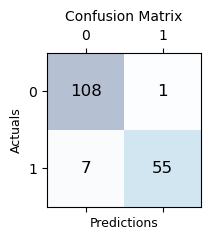

In [14]:
# implement the KNN

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(xTrain, yTrain)

yPred = knn.predict(xTest)

cm = confusion_matrix(yTest, yPred)
acc = accuracy_score(yTest, yPred)

print("Score: {:.3f}".format(acc))


fig, ax = plt.subplots(figsize=(2, 2))
    
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j], va = 'center', ha = 'center', size = 'large')

ax.set_title('Confusion Matrix', fontsize = 10)
ax.set_xlabel('Predictions', fontsize = 9)
ax.set_ylabel('Actuals', fontsize = 9)

plt.show()

As you see, we implemented a basic KNN model to the data, and we got the accuracy of 95.3%. This is quite high, but it can be improved. Now, let's tune the parameters of the KNN model.

The best training score is 0.970 with the parameters {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}.
Test Score: 0.959, Train Score: 0.977


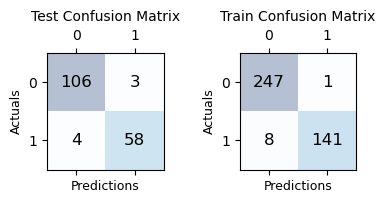

In [15]:
# fine-tune the model

def knn_best_params(x_train, x_test, y_train, y_test):
    # create the params that we will change
    kRange = list(range(1, 31))
    weightOptions = ["uniform", "distance"]
    algorithmOptions = ["auto", "ball_tree", "kd_tree", "brute"]
    pOptions = [1, 2]
    
    paramGrid = dict(n_neighbors = kRange, 
                     weights = weightOptions,
                     algorithm = algorithmOptions,
                     p = pOptions)
    
    # create a new KNNN model
    knn = KNeighborsClassifier()
    
    # thanks to Grid Search, we can try our params.
    grid = GridSearchCV(knn, paramGrid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("The best training score is {:.3f} with the parameters {}.".format(grid.best_score_, 
                                                                          grid.best_params_))
    
    # create another KNN model, and fit the model with 
    # the params that we found above.
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    yPredTest = knn.predict(x_test)
    yPredTrain = knn.predict(x_train)
    
    # create confusion matrices
    cmTest = confusion_matrix(y_test, yPredTest)
    cmTrain = confusion_matrix(y_train, yPredTrain)
    
    # calculate the accuricies
    accTest = accuracy_score(y_test, yPredTest)
    accTrain = accuracy_score(y_train, yPredTrain)
    print("Test Score: {:.3f}, Train Score: {:.3f}".format(accTest, accTrain))
    
    # visualize confusion matrices 
    fig, ax = plt.subplots(1, 2, figsize=(4, 2))
    
    ax[0].matshow(cmTest, cmap = plt.cm.Blues, alpha = 0.3)
    for i in range(cmTest.shape[0]):
        for j in range(cmTest.shape[1]):
            ax[0].text(x = j, y = i, s = cmTest[i, j], va = 'center', ha = 'center', size = 'large')
 
    ax[0].set_title('Test Confusion Matrix', fontsize = 10)
    ax[0].set_xlabel('Predictions', fontsize = 9)
    ax[0].set_ylabel('Actuals', fontsize = 9)
    
    ax[1].matshow(cmTrain, cmap = plt.cm.Blues, alpha = 0.3)
    for i in range(cmTrain.shape[0]):
        for j in range(cmTrain.shape[1]):
            ax[1].text(x = j, y = i, s = cmTrain[i, j], va = 'center', ha = 'center', size = 'large')
 
    ax[1].set_title('Train Confusion Matrix', fontsize = 10)
    ax[1].set_xlabel('Predictions', fontsize = 9)
    ax[1].set_ylabel('Actuals', fontsize = 9)
    
    plt.tight_layout()
    plt.show()
    
    return grid

grid = knn_best_params(xTrain, xTest, yTrain, yTest)

When looking at the scores, we realized that there is a slight overfitting problem. Now, let's deal with this problem.

## Principle Component Analsis (PCA)

We can think that the overfitting problem that we have causes the complexity of datasets. Therefore, reducing the complexity of the dataset might be a solution. To do this, we will use the method of PCA. Before applying the PCA, we need to standardize the data. Then, we can apply it.

In [16]:
# standardization

scaler = StandardScaler()
xScaled = scaler.fit_transform(x)

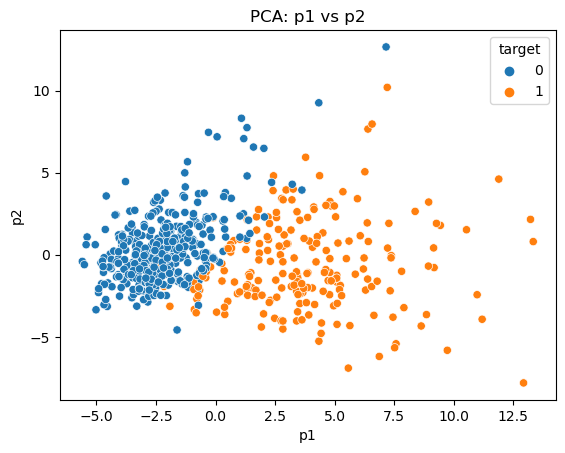

In [17]:
# dimension reduction with PCA

pca = PCA(n_components = 2)
xReducedPca = pca.fit_transform(xScaled)

pcaData = pd.DataFrame(xReducedPca, columns = ["p1", "p2"])
pcaData["target"] = y

sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pcaData)
plt.title("PCA: p1 vs p2")

plt.show()

The best training score is 0.942 with the parameters {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}.
Test Score: 0.924, Train Score: 0.947


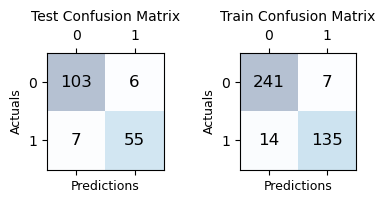

In [18]:
# create train test split for the PCA and run the KNN model 
# with the data we get from the PCA

xTrainPca, xTestPca, yTrainPca, yTestPca = train_test_split(xReducedPca, y, test_size = 0.3, random_state = 42)

gridPca = knn_best_params(xTrainPca, xTestPca, yTrainPca, yTestPca)

After the implementation of the PCA, the accuracy dropped because we lost some information when reducing the dimensions. This is a quite normal result. Now, to increase the accuracy more than before, we need to apply the method of Neighbourhood Components Analysis (NCA).

## Neighbourhood Components Analysis (NCA)

Neighbourhood components analysis is a supervised learning method for classifying multivariate data into distinct classes according to a given distance metric over the data. You can get more information about the NCA by cliclking the following link: https://en.wikipedia.org/wiki/Neighbourhood_components_analysis

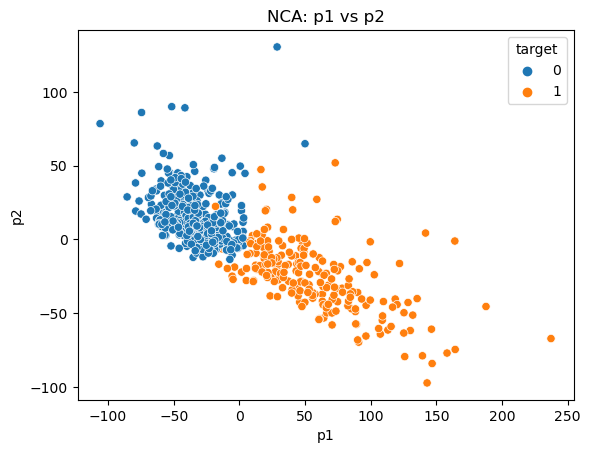

The best training score is 0.990 with the parameters {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}.
Test Score: 0.994, Train Score: 1.000


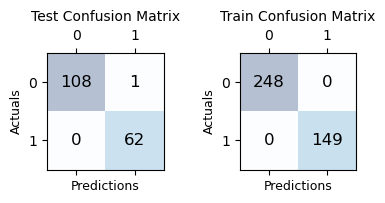

In [19]:
# apply the NCA

nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
xReducedNca = nca.fit_transform(xScaled, y)

ncaData = pd.DataFrame(xReducedNca, columns = ["p1", "p2"])
ncaData["target"] = y

sns.scatterplot(x = "p1", y = "p2", hue = "target", data = ncaData)
plt.title("NCA: p1 vs p2")

plt.show()

# create train test split for the NCA and run the KNN model 
# with the data we get from the NCA

xTrainNca, xTestNca, yTrainNca, yTestNca = train_test_split(xReducedNca, y, test_size = 0.3, random_state = 42)

gridNca = knn_best_params(xTrainNca, xTestNca, yTrainPca, yTestNca)

As you can see, we got 99.4% accuracy in the test data. This is the highest score that we have ever gotten. Also, the difference between the test and training scores was reduced. This means that we dealt with the overfitting problem partially successfully.

## Results

In this notebook, we built a model that can predict whether a person is suffering from breast cancer or not by looking at the data. First, we preprocessed the data, then we used a KNN classifier. We got 95.3%, 95.9%, 92.4% and 99.4% accuracies respectively. The last one is our final accuracy value. Consequently, we predicted the Breast Cancer Wisconsin (Diagnostic) Data Set with 99.4% accuracy.